In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
players_data = pd.read_csv("../datasets/visualisation_hw/player_data.csv")

In [3]:
players_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,"June 24, 1968",Duke University
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,"April 7, 1946",Iowa State University
2,Kareem Abdul-Jabbar,1970,1989,C,7-2,225.0,"April 16, 1947","University of California, Los Angeles"
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,"March 9, 1969",Louisiana State University
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,"November 3, 1974",San Jose State University


In [4]:
players_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4550 entries, 0 to 4549
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        4550 non-null   object 
 1   year_start  4550 non-null   int64  
 2   year_end    4550 non-null   int64  
 3   position    4549 non-null   object 
 4   height      4549 non-null   object 
 5   weight      4544 non-null   float64
 6   birth_date  4519 non-null   object 
 7   college     4248 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 284.5+ KB


#### Convert datatypes for some features to make it easier to work with:


Converting height to cm

In [5]:
players_data["height"] = players_data["height"].fillna("0-0")
players_data["height"] = players_data["height"].apply(
    lambda x: int(x.split("-")[0]) * 30.48 + int(x.split("-")[1]) * 2.54
)

Calculating the career properties - length, start age & end age

In [6]:
players_data["career_length"] = players_data.apply(lambda player: player["year_end"] - player["year_start"], axis=1)

In [7]:
players_data["birth_date"].isna().sum() / players_data.shape[0]

0.006813186813186814

Remove players without birt's date because visualisation will be hardly depend on it and there is not a lot of such records

In [8]:
players_data = players_data[players_data["birth_date"].notna()]

In [9]:
def get_decade(date):
    if isinstance(date, str):
        date = date.rsplit(" ")[-1]
    return int(date) - int(date) % 10


players_data["birth_year"] = players_data["birth_date"].apply(get_decade)
players_data["birth_decade"] = players_data["birth_year"].apply(get_decade)
players_data["decade_start"] = players_data["year_start"].apply(get_decade)
players_data["decade_end"] = players_data["year_end"].apply(get_decade)

players_data["age_start"] = players_data["year_start"] - players_data["birth_year"]
players_data["age_end"] = players_data["year_end"] - players_data["birth_year"]

In [10]:
players_data.head()

,name,year_start,year_end,position,height,weight,birth_date,college,career_length,birth_year,birth_decade,decade_start,decade_end,age_start,age_end
0,Alaa Abdelnaby,1991,1995,F-C,208.28,240.0,"June 24, 1968",Duke University,4,1960,1960,1990,1990,31,35
1,Zaid Abdul-Aziz,1969,1978,C-F,205.74,235.0,"April 7, 1946",Iowa State University,9,1940,1940,1960,1970,29,38
2,Kareem Abdul-Jabbar,1970,1989,C,218.44,225.0,"April 16, 1947","University of California, Los Angeles",19,1940,1940,1970,1980,30,49
3,Mahmoud Abdul-Rauf,1991,2001,G,185.42,162.0,"March 9, 1969",Louisiana State University,10,1960,1960,1990,2000,31,41
4,Tariq Abdul-Wahad,1998,2003,F,198.12,223.0,"November 3, 1974",San Jose State University,5,1970,1970,1990,2000,28,33


#### Some features during the time

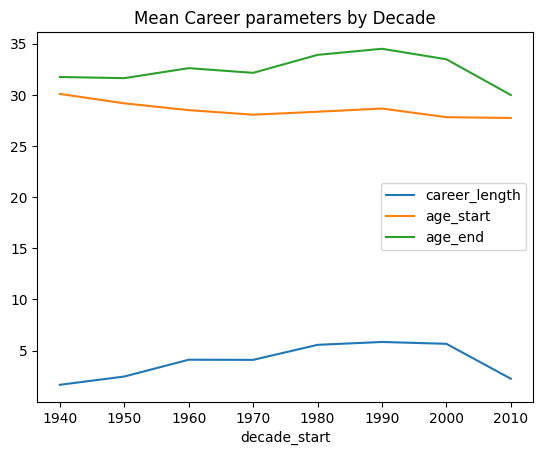

In [11]:
career_parameters_changes = players_data.groupby("decade_start").aggregate(
    {"career_length": "mean", "age_start": "mean", "age_end": "mean"}
)
career_parameters_changes.plot(kind="line")
plt.title("Mean Career parameters by Decade")
plt.show()

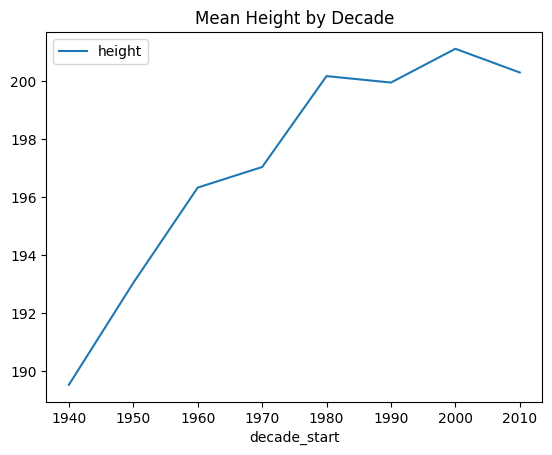

In [12]:
players_data.groupby("decade_start").aggregate({"height": "mean"}).plot(kind="line")
plt.title("Mean Height by Decade")
plt.show()

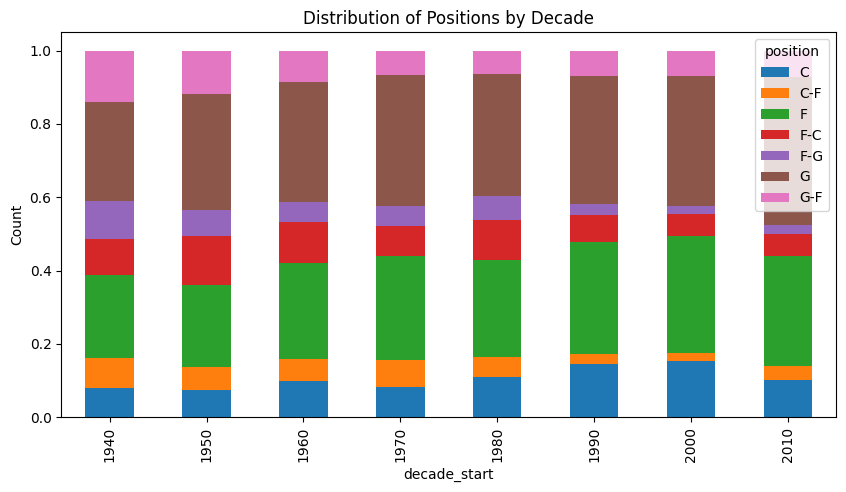

In [13]:
position_counts = players_data.groupby(["decade_start", "position"]).size().unstack()
position_counts = position_counts.div(position_counts.sum(axis=1), axis=0)

position_counts.plot(kind="bar", stacked=True, figsize=(10, 5))
plt.ylabel("Count")
plt.title("Distribution of Positions by Decade")
plt.show()

In [44]:
valuable_colleges = players_data.groupby("college").size() >= 30
valuable_colleges_names = valuable_colleges[valuable_colleges].index
colleges_popularity = players_data[players_data["college"].isin(valuable_colleges_names)]

colleges_popularity = colleges_popularity.groupby(["decade_start", "college"]).size().reset_index()
colleges_popularity.columns = ["decade_start", "college", "num_players"]

data_pivot = colleges_popularity.pivot("college", "decade_start", "num_players")
data_pivot = data_pivot.fillna(0)
data_pivot

/var/folders/5m/vtkls86x2_n4srmnn0xjgxs40000gn/T/ipykernel_65323/1188252251.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  data_pivot = colleges_popularity.pivot('college', 'decade_start', 'num_players')


decade_start,1940,1950,1960,1970,1980,1990,2000,2010
college,,,,,,,,
DePaul University,7.0,5.0,2.0,2.0,7.0,2.0,6.0,0.0
Duke University,1.0,1.0,9.0,4.0,9.0,9.0,17.0,21.0
Florida State University,0.0,0.0,1.0,7.0,4.0,10.0,3.0,9.0
Georgetown University,6.0,3.0,0.0,0.0,9.0,10.0,4.0,7.0
Georgia Institute of Technology,0.0,1.0,2.0,0.0,6.0,13.0,11.0,5.0
Indiana University,5.0,4.0,9.0,12.0,9.0,8.0,6.0,7.0
Louisiana State University,0.0,3.0,0.0,7.0,6.0,6.0,8.0,10.0
Marquette University,1.0,1.0,2.0,13.0,4.0,5.0,3.0,10.0
Michigan State University,1.0,4.0,5.0,3.0,7.0,8.0,9.0,10.0


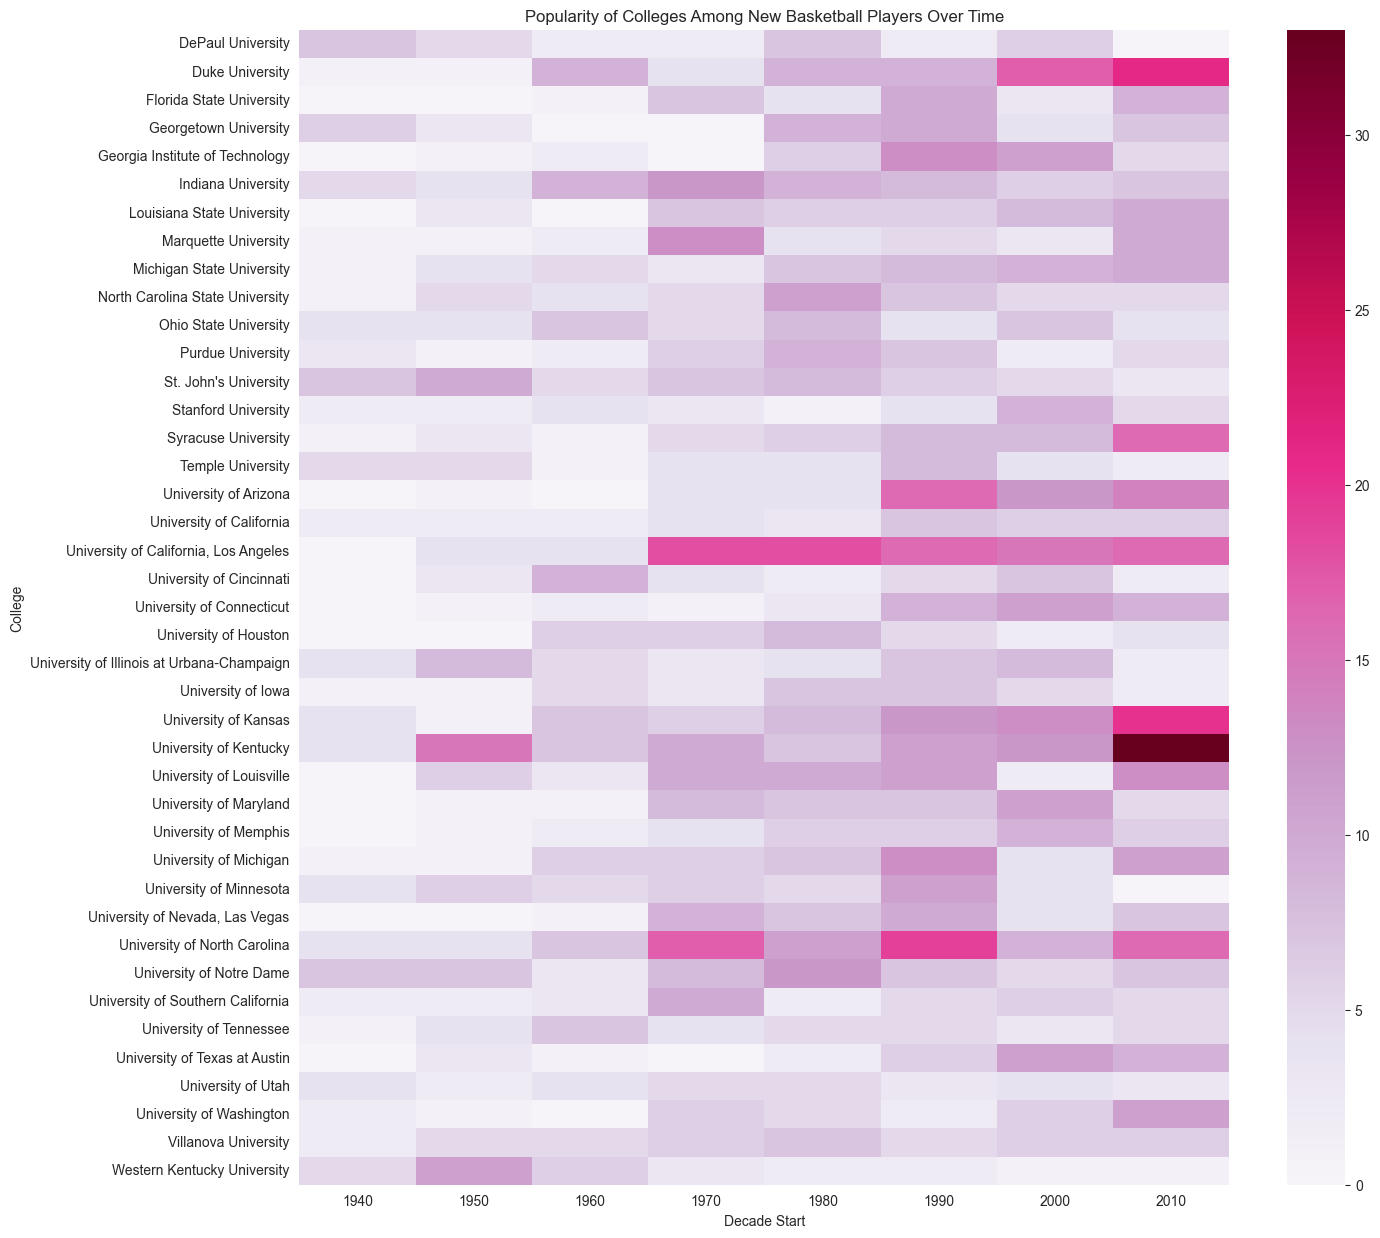

In [49]:
import seaborn as sns

plt.figure(figsize=(15, 15))
sns.heatmap(data_pivot, cmap="PuRd")
plt.title("Popularity of Colleges Among New Basketball Players Over Time")
plt.xlabel("Decade Start")
plt.ylabel("College")
plt.show()